In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, tree, svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, fbeta_score
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier 
from joblib import dump

In [5]:
def normalize_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

In [6]:
df = pd.read_csv('p_train.csv')

df

,yyyy,sex,Job classification,Job level,Factory code,Layers of management,Work experience1,Work experience2,Work experience3,Work experience4,...,Marital Status,Job tenure level A,Job tenure level B,Job tenure level C,Average number of years of work before employment,Graduated School category,Graduated Department category,Family numbers,Commuting cost,Affiliated department
0,2014,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,...,1.0,2.0,1.0,1.0,2.0,0.0,5.0,0.0,8.0,19138.0
1,2015,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,0.0,5.0,2.0,8.0,19138.0
2,2016,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,0.0,5.0,2.0,8.0,19138.0
3,2017,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,0.0,5.0,2.0,8.0,19138.0
4,2014,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,5.0,5.0,0.0,0.0,4.0,1.0,2.0,8.0,8181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,6.0,5.0,2.0,1.0,3.0,8.0,2.0,8.0,8012.0
14388,2015,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,6.0,5.0,2.0,1.0,3.0,8.0,2.0,8.0,8012.0
14389,2016,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,7.0,6.0,2.0,1.0,3.0,8.0,2.0,8.0,8012.0
14390,2017,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,7.0,6.0,2.0,1.0,3.0,8.0,2.0,8.0,8012.0


In [4]:
df.fillna(method='ffill', inplace=True)
df.info()
df.fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14392 entries, 0 to 14391
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yyyy       14392 non-null  int64  
 1   PerNo      14392 non-null  int64  
 2   PerStatus  14392 non-null  int64  
 3   sex        14392 non-null  float64
 4   工作分類       14392 non-null  float64
 5   職等         14392 non-null  float64
 6   廠區代碼       14392 non-null  float64
 7   管理層級       14392 non-null  float64
 8   工作資歷1      14392 non-null  float64
 9   工作資歷2      14392 non-null  float64
 10  工作資歷3      14392 non-null  float64
 11  工作資歷4      14392 non-null  float64
 12  工作資歷5      14392 non-null  float64
 13  專案時數       14392 non-null  float64
 14  專案總數       14392 non-null  float64
 15  當前專案角色     14392 non-null  float64
 16  特殊專案佔比     14392 non-null  float64
 17  工作地點       14392 non-null  float64
 18  訓練時數A      14392 non-null  float64
 19  訓練時數B      14392 non-null  float64
 20  訓練時數C 

In [5]:
X = normalize_data(df.drop('PerNo', axis=1).drop('PerStatus', axis=1))
Y = df.PerStatus.values

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Random Forest

In [85]:
rfc = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10, 20,50],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
model = grid.fit(X, Y)

print('Best Estimator:',model.best_estimator_)
print('Best Random Forest Score:',model.best_score_)
model=model.best_estimator_.fit(x_train, y_train)

y_preds = model.predict(x_test)
test_accuracy_rf = metrics.accuracy_score(y_test, y_preds)
test_recall_rf = metrics.recall_score(y_test, y_preds)

print('Test Accuracy:', test_accuracy_rf)
print('Test Sensitivity:', test_recall_rf)

Best Estimator: RandomForestClassifier(n_estimators=50)
Best Random Forest Score: 0.9449694039070342
Test Accuracy: 0.9482459187217784
Test Sensitivity: 0.013422818791946308


Optimal number of features : 2


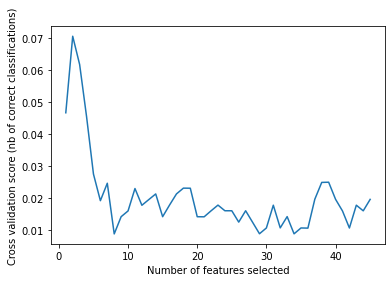

In [22]:
rf_rfecv = RFECV(estimator=RandomForestClassifier(n_estimators=50), step=1, cv=StratifiedKFold(5), 
                 scoring=make_scorer(fbeta_score, beta=1.5))
rf_rfecv.fit(X, Y)

print("Optimal number of features : %d" % rf_rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rf_rfecv.grid_scores_) + 1), rf_rfecv.grid_scores_)
plt.show()

# Decision Tree

In [95]:
parameters={
    'min_samples_split' : range(10,500,50),
    'max_depth': range(1,16,2)
}

clf_tree=tree.DecisionTreeClassifier()

clf=GridSearchCV(clf_tree,parameters)

model = clf.fit(X,Y)

# examine the best model
print('Best Estimator:', model.best_estimator_)
print('Best Score:', model.best_score_)

model=model.best_estimator_.fit(x_train, y_train)

# predictions for test set
y_preds = model.predict(x_test)

# calculate test score
test_accuracy_dt = metrics.accuracy_score(y_test, y_preds)
test_recall_dt = metrics.recall_score(y_test, y_preds)

print('Test Accuracy:', test_accuracy_dt)
print('Test Sensitivity:', test_recall_dt)

Best Estimator: DecisionTreeClassifier(max_depth=1, min_samples_split=10)
Best Score: 0.9446915081557978
Test Accuracy: 0.944077804793331
Test Sensitivity: 0.0


Optimal number of features : 13


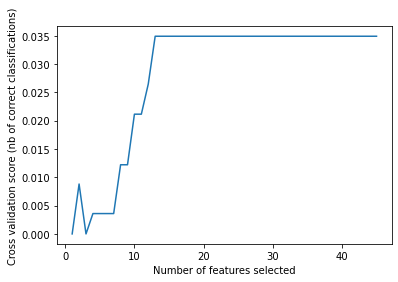

In [37]:
dt_rfecv = RFECV(estimator=tree.DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=30),
                 step=1, cv=StratifiedKFold(5), scoring=make_scorer(fbeta_score, beta=1.5))
dt_rfecv.fit(X, Y)

print("Optimal number of features : %d" % dt_rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(dt_rfecv.grid_scores_) + 1), dt_rfecv.grid_scores_)
plt.show()

# KNN Classifier

In [49]:
x = X.values
std_x = normalize_data(x)

x_train, x_test, y_train, y_test = train_test_split(std_x, Y, test_size=0.2)

krange = list(range(1, 31))
param_grid = dict(n_neighbors=krange)

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=10, scoring=make_scorer(fbeta_score, beta=1.5))

model = grid.fit(std_x, Y)

print('Best Estimator:', model.best_estimator_)
print('Best score:', model.best_score_)

model = model.best_estimator_.fit(x_train, y_train)

# predictions for test set
y_preds = model.predict(x_test)

# calculate test score
test_accuracy_dt = metrics.accuracy_score(y_test, y_preds)
test_recall_dt = metrics.recall_score(y_test, y_preds)
test_fbeta = fbeta_score(y_test, y_preds, beta=1.5)

print('Test Accuracy:', test_accuracy_dt)
print('Test Sensitivity:', test_recall_dt)
print('Test F_beta score:', test_fbeta)

Best Estimator: KNeighborsClassifier(n_neighbors=1)
Best score: 0.10262786750303028
Test Accuracy: 0.9069121222646752
Test Sensitivity: 0.05389221556886228
F_beta score: 0.05912076806467913


# Extra Trees Classifiers

Optimal number of features : 1


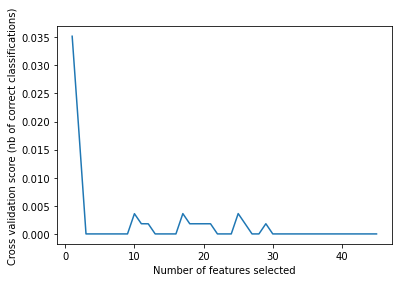

In [95]:
exclf_rfecv = RFECV(estimator=ExtraTreesClassifier(min_samples_split=10, min_samples_leaf=10), step=1, 
                  cv=StratifiedKFold(5), scoring=make_scorer(fbeta_score, beta=1.5))
exclf_rfecv.fit(X, Y)

print("Optimal number of features : %d" % exclf_rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(exclf_rfecv.grid_scores_) + 1), exclf_rfecv.grid_scores_)
plt.show()

# SVM

In [9]:
for col in X.columns:
    if col != '生產總額' and col != '歸屬部門':
        X.drop(col, axis=1, inplace=True)

x = X.values
std_x = normalize_data(x)

x_train, x_test, y_train, y_test = train_test_split(std_x, Y, test_size=0.2)

svm_clf = svm.SVC(gamma='auto', C=100)

svm_model = svm_clf.fit(std_x, Y)

model = svm_model.fit(x_train, y_train)

# predictions for test set
y_preds = model.predict(x_test)

# calculate test score
test_accuracy_dt = metrics.accuracy_score(y_test, y_preds)
test_recall_dt = metrics.recall_score(y_test, y_preds)
test_fbeta = fbeta_score(y_test, y_preds, beta=1.5)

print('Test Accuracy:', test_accuracy_dt)
print('Test Sensitivity:', test_recall_dt)
print('Test F_beta score:', test_fbeta)

Test Accuracy: 0.9430357763112192
Test Sensitivity: 0.0
Test F_beta score: 0.0


# Gradient Boosting

In [37]:
X_val = X.values
clf = GradientBoostingClassifier(n_estimators=100)

scores = cross_val_score(clf, X_val, Y, cv=10)

print('CV Score:',scores.mean())
model = clf.fit(x_train, y_train)

# predictions for test set
y_preds = model.predict(x_test)

# calculate test score
test_accuracy_gb = metrics.accuracy_score(y_test, y_preds)
test_recall_gb = metrics.recall_score(y_test, y_preds)
test_fbeta = fbeta_score(y_test, y_preds, beta=1.5)

print('Test Accuracy:', test_accuracy_gb)
print('Test Sensitivity:', test_recall_gb)
print('Test F_beta score:', test_fbeta)

CV Score: 0.9433018203227551
Test Accuracy: 0.9472038902396666
Test Sensitivity: 0.02027027027027027
Test F_beta score: 0.028425655976676387


Done estimating!
Fitting Finished...!
Optimal number of features : 3


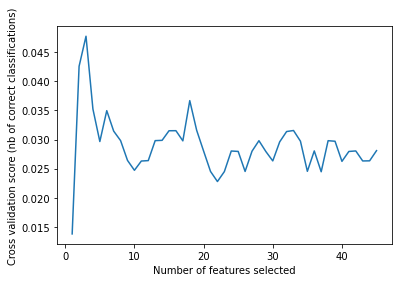

In [48]:
exclf_rfecv = RFECV(estimator=GradientBoostingClassifier(learning_rate=0.1),
                    step=1, cv=StratifiedKFold(5), scoring=make_scorer(fbeta_score, beta=1.5))
print('Done estimating!')
exclf_rfecv.fit(X, Y)
print('Fitting Finished...!')

print("Optimal number of features : %d" % exclf_rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(exclf_rfecv.grid_scores_) + 1), exclf_rfecv.grid_scores_)
plt.show()

# MLP Classifier

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

clf = MLPClassifier(max_iter = 1000)

scores = cross_val_score(clf, X, Y, cv=10)

print('Training finished...')
print('CV Score:',scores.mean())
model = clf.fit(x_train, y_train)

# predictions for test set
y_preds = model.predict(x_test)

# calculate test score
test_accuracy_gb = metrics.accuracy_score(y_test, y_preds)
test_recall_gb = metrics.recall_score(y_test, y_preds)
test_fbeta = fbeta_score(y_test, y_preds, beta=1.5)

print('Test Accuracy:', test_accuracy_gb)
print('Test Sensitivity:', test_recall_gb)
print('Test F_beta score:', test_fbeta)

Training finished...
CV Score: 0.9129383831364375
Test Accuracy: 0.9246266064605766
Test Sensitivity: 0.13245033112582782
Test F_beta score: 0.14582164890633767


In [12]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
x_train_rfecv = rf_rfecv.transform(x_train)
x_test_rfecv = rf_rfecv.transform(x_test)

In [24]:
scaler = StandardScaler()
scaler.fit(x_train_rfecv)
x_train_rfecv = scaler.transform(x_train_rfecv)

In [26]:
rfecv_model = RandomForestClassifier(n_estimators=50).fit(x_train_rfecv, y_train)

In [29]:
print(rfecv_model.score(x_test_rfecv, y_test))
predict = rfecv_model.predict(x_test_rfecv)
metrics.fbeta_score(y_test, predict, beta=1.5)

0.935046891281695


0.07155963302752294

In [13]:
dump(model, 'MLP.joblib')

['MLP.joblib']